In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
path = 'C:/Users/Yashwardhan Banta/Desktop/DataInfoSec Data Analytics Internship/bestsellers with categories.csv'
df = pd.read_csv(path,header=0)

In [3]:
df.head()

,Name,Author,User Rating,Reviews,Price,Year,Genre
0,10-Day Green Smoothie Cleanse,JJ Smith,4.7,17350,8,2016,Non Fiction
1,11/22/63: A Novel,Stephen King,4.6,2052,22,2011,Fiction
2,12 Rules for Life: An Antidote to Chaos,Jordan B. Peterson,4.7,18979,15,2018,Non Fiction
3,1984 (Signet Classics),George Orwell,4.7,21424,6,2017,Fiction
4,"5,000 Awesome Facts (About Everything!) (Natio...",National Geographic Kids,4.8,7665,12,2019,Non Fiction


##### The data has been imported correctly.

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550 entries, 0 to 549
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Name         550 non-null    object 
 1   Author       550 non-null    object 
 2   User Rating  550 non-null    float64
 3   Reviews      550 non-null    int64  
 4   Price        550 non-null    int64  
 5   Year         550 non-null    int64  
 6   Genre        550 non-null    object 
dtypes: float64(1), int64(3), object(3)
memory usage: 30.2+ KB


##### There are no missing values.

In [5]:
df['Price'] = df['Price'].astype('float') # we change the variable type of price from integer to float.

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550 entries, 0 to 549
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Name         550 non-null    object 
 1   Author       550 non-null    object 
 2   User Rating  550 non-null    float64
 3   Reviews      550 non-null    int64  
 4   Price        550 non-null    float64
 5   Year         550 non-null    int64  
 6   Genre        550 non-null    object 
dtypes: float64(2), int64(2), object(3)
memory usage: 30.2+ KB


In [7]:
df.describe(include='all')

,Name,Author,User Rating,Reviews,Price,Year,Genre
count,550,550,550.000000,550.000000,550.000000,550.000000,550
unique,351,248,NaN,NaN,NaN,NaN,2
top,Publication Manual of the American Psychologic...,Jeff Kinney,NaN,NaN,NaN,NaN,Non Fiction
freq,10,12,NaN,NaN,NaN,NaN,310
mean,NaN,NaN,4.618364,11953.281818,13.100000,2014.000000,NaN
std,NaN,NaN,0.226980,11731.132017,10.842262,3.165156,NaN
min,NaN,NaN,3.300000,37.000000,0.000000,2009.000000,NaN
25%,NaN,NaN,4.500000,4058.000000,7.000000,2011.000000,NaN
50%,NaN,NaN,4.700000,8580.000000,11.000000,2014.000000,NaN
75%,NaN,NaN,4.800000,17253.250000,16.000000,2017.000000,NaN


##### We can observe that for the numerical variables, 'Reviews' and 'Price', the mean and max quantities for the two are too far apart, indicating the presence of outliers in both. For the 'User Rating' variable, there are outliers as well (as may be seen in a boxplot of the same).

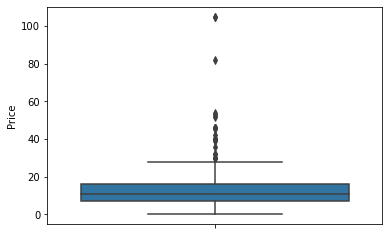

In [8]:
sns.boxplot(y=df.Price)

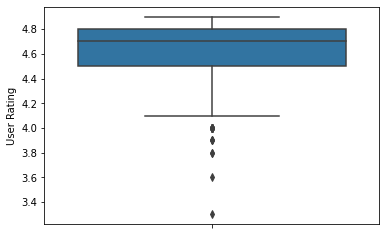

In [9]:
sns.boxplot(y=df['User Rating'])

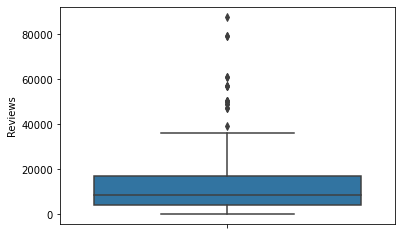

In [10]:
sns.boxplot(y=df['Reviews'])

##### The above three plots confirm our hypothesis.
##### We will look at the outliers for the 'Price' and 'User Rating' variables below.

In [11]:
lv_price = np.percentile(df.Price,[25])
uv_price = np.percentile(df.Price,[75])
iqr_price = uv_price-lv_price

uv_price+(1.5*iqr_price)
df[(df.Price)>29.5].sort_values('Price')

,Name,Author,User Rating,Reviews,Price,Year,Genre
6,A Game of Thrones / A Clash of Kings / A Storm...,George R. R. Martin,4.7,19735,30.0,2014,Fiction
153,Harry Potter and the Chamber of Secrets: The I...,J.K. Rowling,4.9,19622,30.0,2016,Fiction
156,Harry Potter and the Prisoner of Azkaban: The ...,J.K. Rowling,4.9,3146,30.0,2017,Fiction
411,The Hunger Games Trilogy Boxed Set (1),Suzanne Collins,4.8,16949,30.0,2012,Fiction
410,The Hunger Games Trilogy Boxed Set (1),Suzanne Collins,4.8,16949,30.0,2011,Fiction
12,A Stolen Life: A Memoir,Jaycee Dugard,4.6,4149,32.0,2011,Non Fiction
108,Fifty Shades Trilogy (Fifty Shades of Grey / F...,E L James,4.5,13964,32.0,2012,Fiction
444,"The Official SAT Study Guide, 2016 Edition (Of...",The College Board,4.3,807,36.0,2016,Non Fiction
338,The Alchemist,Paulo Coelho,4.7,35799,39.0,2014,Fiction
443,The Official SAT Study Guide,The College Board,4.4,1201,40.0,2014,Non Fiction


In [12]:
lv_rating = np.percentile(df['User Rating'],[25])
uv_rating = np.percentile(df['User Rating'],[75])
iqr_rating = uv_rating-lv_rating

print(lv_rating-(1.5*iqr_rating))
df[(df['User Rating'])<4.05]

[4.05]


,Name,Author,User Rating,Reviews,Price,Year,Genre
22,Allegiant,Veronica Roth,3.9,6310,13.0,2013,Fiction
106,Fifty Shades of Grey: Book One of the Fifty Sh...,E L James,3.8,47265,14.0,2012,Fiction
107,Fifty Shades of Grey: Book One of the Fifty Sh...,E L James,3.8,47265,14.0,2013,Fiction
132,Go Set a Watchman: A Novel,Harper Lee,3.6,14982,19.0,2015,Fiction
135,Gone Girl,Gillian Flynn,4.0,57271,10.0,2012,Fiction
136,Gone Girl,Gillian Flynn,4.0,57271,10.0,2013,Fiction
137,Gone Girl,Gillian Flynn,4.0,57271,9.0,2014,Fiction
154,"Harry Potter and the Cursed Child, Parts 1 & 2...",J.K. Rowling,4.0,23973,12.0,2016,Fiction
304,StrengthsFinder 2.0,Gallup,4.0,5069,17.0,2009,Non Fiction
305,StrengthsFinder 2.0,Gallup,4.0,5069,17.0,2010,Non Fiction


##### We will proceed to display pairplots for the numerical variables.

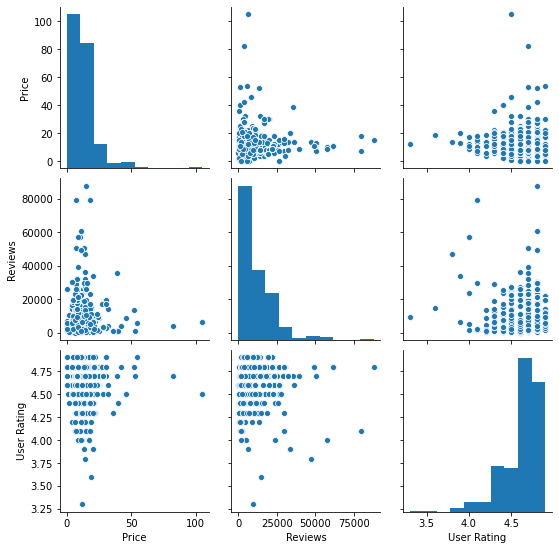

In [13]:
sns.pairplot(df[['Price','Reviews','User Rating']])

##### The variables 'Price' and 'Reviews' may be non-linearly related, as can be seen from the graph(s) above.

##### We will now describe the relation between variable Price and Genre in quantitative terms.

In [14]:
df_dummies = pd.get_dummies(df.Genre)
df_cov = df[['Price','Genre']]
df_cov = pd.concat([df_cov,df_dummies],axis=1)
df_cov

,Price,Genre,Fiction,Non Fiction
0,8.0,Non Fiction,0,1
1,22.0,Fiction,1,0
2,15.0,Non Fiction,0,1
3,6.0,Fiction,1,0
4,12.0,Non Fiction,0,1
...,...,...,...,...
545,8.0,Fiction,1,0
546,8.0,Non Fiction,0,1
547,8.0,Non Fiction,0,1
548,8.0,Non Fiction,0,1


In [15]:
# we will find the covariance between genre and price variables.
df_cov.Genre.value_counts()

Non Fiction    310
Fiction        240
Name: Genre, dtype: int64

In [16]:
p0 = 310/550
p1 = 240/550
sx = df.Price.std()
y0 = df_cov['Price'].loc[df_cov.Fiction==1].sum()/len(df_cov['Price'].loc[df_cov.Fiction==1])
y1 = df_cov['Price'].loc[df_cov.Fiction==0].sum()/len(df_cov['Price'].loc[df_cov.Fiction==0])
from math import sqrt
bi_serial_corr = ((y0-y1)/sx)*sqrt(p0*p1)
bi_serial_corr

-0.18259437529993477

##### This indicates weak relation amongst the two variables, one of which is a categorical variable (Genre) and the other a numerical variable (Price).

Text(0.5, 1.0, 'Countplot of genres of book released per year as per the given data.')

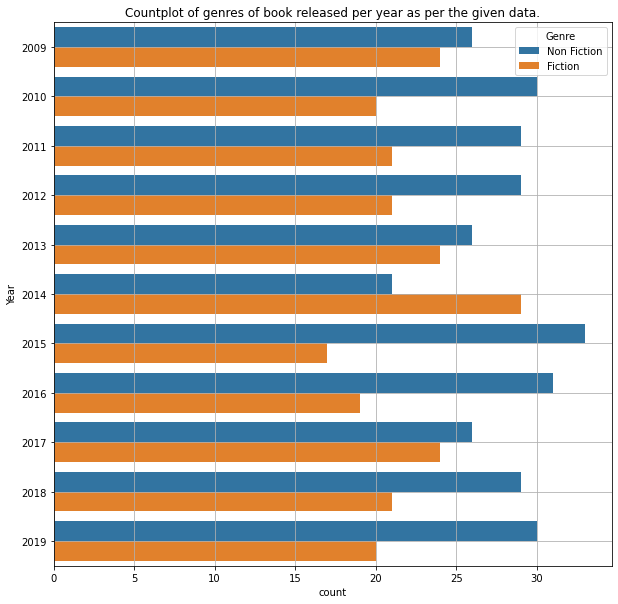

In [17]:
plt.figure(figsize=(10,10))
sns.countplot(y=df.Year,hue=df.Genre)
plt.grid()
plt.title('Countplot of genres of book released per year as per the given data.')

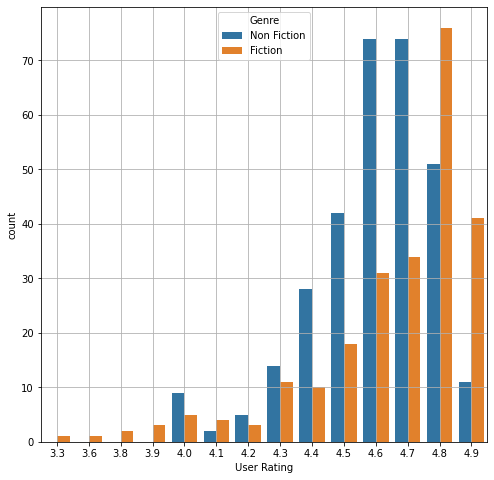

In [18]:
plt.figure(figsize=(8,8))
sns.countplot(df['User Rating'],hue=df.Genre)
plt.grid()

In [19]:
df.sort_values(['Reviews'],ascending=False)

,Name,Author,User Rating,Reviews,Price,Year,Genre
534,Where the Crawdads Sing,Delia Owens,4.8,87841,15.0,2019,Fiction
382,The Girl on the Train,Paula Hawkins,4.1,79446,18.0,2015,Fiction
383,The Girl on the Train,Paula Hawkins,4.1,79446,7.0,2016,Fiction
32,Becoming,Michelle Obama,4.8,61133,11.0,2018,Non Fiction
33,Becoming,Michelle Obama,4.8,61133,11.0,2019,Non Fiction
...,...,...,...,...,...,...,...
359,The Daily Show with Jon Stewart Presents Earth...,Jon Stewart,4.4,440,11.0,2010,Non Fiction
512,True Compass: A Memoir,Edward M. Kennedy,4.5,438,15.0,2009,Non Fiction
121,George Washington's Sacred Fire,Peter A. Lillback,4.5,408,20.0,2010,Non Fiction
300,Soul Healing Miracles: Ancient and New Sacred ...,Zhi Gang Sha,4.6,220,17.0,2013,Non Fiction


##### Out of all the books, the book 'Where the Crawdads Sing' by 'Delia Owens' has the most Reviews and it not only has a very good user rating but also a reasonable price near the mean, and it is a fiction. It may be considered as one of the bestsellers.

In [20]:
df.sort_values(['User Rating'],ascending=False)

,Name,Author,User Rating,Reviews,Price,Year,Genre
431,The Magnolia Story,Chip Gaines,4.9,7861,5.0,2016,Non Fiction
87,Dog Man: Lord of the Fleas: From the Creator o...,Dav Pilkey,4.9,5470,6.0,2018,Fiction
85,Dog Man: Fetch-22: From the Creator of Captain...,Dav Pilkey,4.9,12619,8.0,2019,Fiction
84,Dog Man: Brawl of the Wild: From the Creator o...,Dav Pilkey,4.9,7235,4.0,2019,Fiction
83,Dog Man: Brawl of the Wild: From the Creator o...,Dav Pilkey,4.9,7235,4.0,2018,Fiction
...,...,...,...,...,...,...,...
22,Allegiant,Veronica Roth,3.9,6310,13.0,2013,Fiction
107,Fifty Shades of Grey: Book One of the Fifty Sh...,E L James,3.8,47265,14.0,2013,Fiction
106,Fifty Shades of Grey: Book One of the Fifty Sh...,E L James,3.8,47265,14.0,2012,Fiction
132,Go Set a Watchman: A Novel,Harper Lee,3.6,14982,19.0,2015,Fiction


##### The book 'The Magnolia Story' written by author 'Chip Gaines', has the best user rating and also is very cheap, hence may be one of the bestsellers as well. It is, however,  a Non-Fiction.

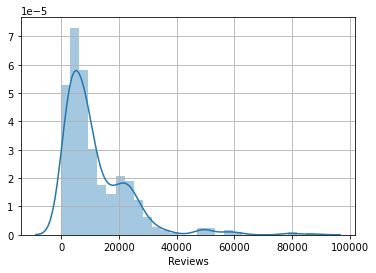

In [21]:
sns.distplot(df.Reviews)
plt.grid()

##### Most of the number of reviews lie in the range 0-20000.

([<matplotlib.patches.Wedge at 0x27c4eb53b50>,
 [Text(-0.218449509639842, 1.078090817945368, 'Non Fiction'),
  Text(0.2184495096398414, -1.0780908179453683, 'Fiction')])

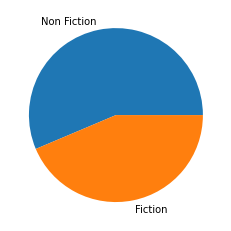

In [22]:
plt.pie(df.Genre.value_counts(),labels=df.Genre.unique(),shadow=False)

##### Thus there are more number of Non-Fiction books in total compared to Fiction genre books.

([<matplotlib.patches.Wedge at 0x27c4eb95610>,
 [Text(1.0554422683381766, 0.30990582150899426, '2016'),
  Text(0.7203467861122989, 0.8313245501834299, '2011'),
  Text(0.15654627576372776, 1.0888035927312634, '2018'),
  Text(-0.4569565739181998, 1.0005951676641962, '2017'),
  Text(-0.9253789316708985, 0.5947048283136995, '2019'),
  Text(-1.0999999999999954, -1.0298943258065002e-07, '2014'),
  Text(-0.9253788203103135, -0.5947050015941457, '2010'),
  Text(-0.456956386553231, -1.0005952532309026, '2009'),
  Text(0.15654647964602333, -1.0888035634174043, '2015'),
  Text(0.7203469417807291, -0.8313244152959488, '2013'),
  Text(1.0554423263691122, -0.30990562387371495, '2012')])

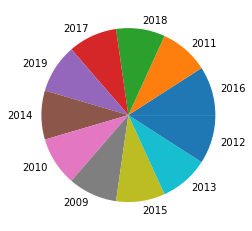

In [23]:
plt.pie(df.Year.value_counts(),labels=df.Year.unique())

##### It is interesting to note that almost an equal proportion of total number of books have been released each year. The distribution plot below confirms this.

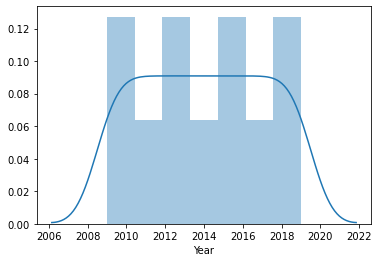

In [24]:
sns.distplot(df.Year)

In [25]:
df.Author.value_counts()

Jeff Kinney                           12
Rick Riordan                          11
Gary Chapman                          11
Suzanne Collins                       11
American Psychological Association    10
                                      ..
Margaret Atwood                        1
Coloring Books for Adults              1
Jonathan Cahn                          1
Daniel H. Pink                         1
Mark Owen                              1
Name: Author, Length: 248, dtype: int64

##### Most of the books have been written by 'Jeff Kinney'.

#### As we did in the previous weeks' task, we will print some books similar to the one which the user likes.

In [26]:
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import CountVectorizer as cv1
cv = cv1()
# we define two functions, one of which returns the index of the book input and another, which does opposite of the same
def find_index(book):
    index = df1.loc[df1['Name']==book].index[0]
    return index
def find_book(index):
    book = df1['Name'].loc[df1.index==index].values[0]
    return book

# we declare an empty dataframe and concatenate it to the original dataframe, which will later be filled with
# merged values from every column of the corresponding row.



df1 = df[['Name','Author','Genre']]
df_merged = pd.DataFrame({'Merged':[]})
df1 = pd.concat([df1,df_merged],axis=1)
df1 = df1.fillna(" ") # to support the count vecotrizer
for i in range(0,550):
    df1.iloc[i,3] = df1.iloc[i,0]+" "+ df1.iloc[i,1]+" "+df1.iloc[i,2]

# we shall now bring in the use of the modules that we imported earlier
count_matrix = cv.fit_transform(df1['Merged'])
cosine_sim = cosine_similarity(count_matrix)
    

# Finally we, define the main function which will return a list of book similar to the ones which the user likes.
# We make use of the functions we defined earlier to find index of a given book and vice versa.
# This makes use of basic NLP.



def find_similar_books(users_favorite_book):    
    
    book_index = find_index(users_favorite_book)
    similar_books = list(enumerate(cosine_sim[book_index]))
    sorted_similar_books = sorted(similar_books, reverse=True, key= lambda x:x[1])[1:]
    i = 0 
    print(f'Top 4 books similar to "{users_favorite_book}" based on the description and type:\n')
    print('--------------------------------------------------------------------------------------------')
    for book in sorted_similar_books:
        print(f'{i+1}. {find_book(book[0])}')
        i+=1
        if i>3:
            break
    print('--------------------------------------------------------------------------------------------')

In [27]:
find_similar_books('Harry Potter and the Chamber of Secrets: The Illustrated Edition (Harry Potter, Book 2)')

Top 4 books similar to "Harry Potter and the Chamber of Secrets: The Illustrated Edition (Harry Potter, Book 2)" based on the description and type:

--------------------------------------------------------------------------------------------
1. Harry Potter and the Goblet of Fire: The Illustrated Edition (Harry Potter, Book 4) (4)
2. Harry Potter and the Prisoner of Azkaban: The Illustrated Edition (Harry Potter, Book 3)
3. Harry Potter and the Sorcerer's Stone: The Illustrated Edition (Harry Potter, Book 1)
4. Harry Potter and the Cursed Child, Parts 1 & 2, Special Rehearsal Edition Script
--------------------------------------------------------------------------------------------
